In [1]:
# geolocation
# geolocation.describe(include='all')
# products
# sellers
# category_translations

In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score

In [8]:
customers = pd.read_csv('../CSV-Excels/P5_datasets/olist_customers_dataset.csv')
geolocation = pd.read_csv('../CSV-Excels/P5_datasets/olist_geolocation_dataset.csv')
item_orders = pd.read_csv('../CSV-Excels/P5_datasets/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../CSV-Excels/P5_datasets/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../CSV-Excels/P5_datasets/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../CSV-Excels/P5_datasets/olist_orders_dataset.csv')
products = pd.read_csv('../CSV-Excels/P5_datasets/olist_products_dataset.csv')
sellers = pd.read_csv('../CSV-Excels/P5_datasets/olist_sellers_dataset.csv')
category_translations = pd.read_csv('../CSV-Excels/P5_datasets/product_category_name_translation.csv')

In [9]:
customers
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [10]:
customer_ids = customers[["customer_id", "customer_unique_id"]]
customer_ids

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e


In [13]:
orders
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
orders_date_with_customer_id = orders[["customer_id", "order_id", "order_purchase_timestamp"]]
orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
orders_date_with_customer_id = orders_date_with_customer_id.merge(how='left', on='customer_id', right=customer_ids)

/tmp/ipykernel_6785/15476665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])


In [16]:
orders_date_with_customer_id.describe(include='all')

/tmp/ipykernel_6785/904184309.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_date_with_customer_id.describe(include='all')


,customer_id,order_id,order_purchase_timestamp,customer_unique_id
count,99441,99441,99441,99441
unique,99441,99441,98875,96096
top,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2018-04-11 10:48:14,8d50f5eadf50201ccdcedfb9e2ac8455
freq,1,1,3,17
first,NaN,NaN,2016-09-04 21:15:19,NaN
last,NaN,NaN,2018-10-17 17:30:18,NaN


In [17]:
# ajouter la colonne jours depuis dernier achat
orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
orders_date_with_customer_id['days_since_last_purchase'] = (
    orders_date_with_customer_id['order_purchase_timestamp'].max() - orders_date_with_customer_id['order_purchase_timestamp']
).dt.days

In [18]:
# ajouter la colonne achat pour la période de Noel
orders_date_with_customer_id['christmas_purchase'] = orders_date_with_customer_id['order_purchase_timestamp'].apply(
    lambda x: 1 if ((x.strftime("%m/%d") > "11/01") & (x.strftime("%m/%d") < "12/25")) else 0)

In [19]:
orders_date_with_customer_id

,customer_id,order_id,order_purchase_timestamp,customer_unique_id,days_since_last_purchase,christmas_purchase
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,84,0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,70,0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,332,1
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,245,0
...,...,...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,587,0
99437,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,253,0
99438,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,416,0
99439,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,281,0


In [21]:
item_orders
item_orders.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [22]:
# savoir combien d'articles sont achetés :
# supprimer les lignes de même commande pour que order_item_id 
# corresponde au nb de produits achetés lors de la commande

nb_items_bought = item_orders[["order_id", "order_item_id"]]
nb_items_bought.drop_duplicates(subset=['order_id'], keep='last', inplace=True, ignore_index=True)

/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
df = orders_date_with_customer_id.merge(how='left', on='order_id', right=nb_items_bought)

In [24]:
df

,customer_id,order_id,order_purchase_timestamp,customer_unique_id,days_since_last_purchase,christmas_purchase,order_item_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0,1.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,84,0,1.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,70,0,1.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,332,1,1.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,245,0,1.0
...,...,...,...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,587,0,1.0
99437,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,253,0,1.0
99438,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,416,0,1.0
99439,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,281,0,2.0


In [25]:
order_reviews
order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [26]:
order_score = order_reviews[["order_id", "review_score"]]
order_score 

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5
99220,22ec9f0669f784db00fa86d035cf8602,5
99221,55d4004744368f5571d1f590031933e4,5
99222,7725825d039fc1f0ceb7635e3f7d9206,4


In [27]:
df = df.merge(how='left', on='order_id', right=order_score)
df

,customer_id,order_id,order_purchase_timestamp,customer_unique_id,days_since_last_purchase,christmas_purchase,order_item_id,review_score
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0,1.0,4.0
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,84,0,1.0,4.0
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,70,0,1.0,5.0
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,332,1,1.0,5.0
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,245,0,1.0,5.0
...,...,...,...,...,...,...,...,...
99987,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,587,0,1.0,5.0
99988,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,253,0,1.0,4.0
99989,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,416,0,1.0,5.0
99990,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,281,0,2.0,2.0


In [29]:
order_payments
order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


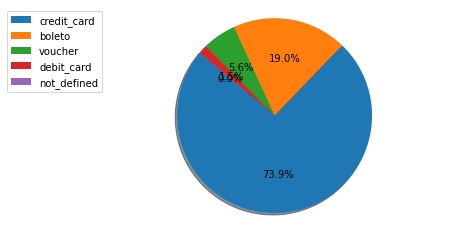

In [45]:
payment_types = order_payments.payment_type.value_counts()
labels = payment_types.index
sizes = payment_types.values

# Plot the pie chart
plt.pie(sizes,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.legend(labels,bbox_to_anchor=(0, 1))
plt.show()

In [46]:
payments = order_payments[["order_id", "payment_installments", "payment_value"]]
payments

,order_id,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,2,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,363.31
103882,7b905861d7c825891d6347454ea7863f,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,5,369.54


In [47]:
df = df.merge(how='left', on='order_id', right=payments)

In [48]:
df

,customer_id,order_id,order_purchase_timestamp,customer_unique_id,days_since_last_purchase,christmas_purchase,order_item_id,review_score,payment_installments,payment_value
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0,1.0,4.0,1.0,18.12
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0,1.0,4.0,1.0,2.00
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,380,0,1.0,4.0,1.0,18.59
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,84,0,1.0,4.0,1.0,141.46
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,70,0,1.0,5.0,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...
104473,39bd1228ee8140590ac3aca26f2dfe00,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,587,0,1.0,5.0,3.0,85.08
104474,1fca14ff2861355f6e5f14306ff977a7,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,253,0,1.0,4.0,3.0,195.00
104475,1aa71eb042121263aafbe80c1b562c9c,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,416,0,1.0,5.0,5.0,271.01
104476,b331b74b18dc79bcdf6532d51e1637c1,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,281,0,2.0,2.0,4.0,441.16


In [49]:
number_of_purchase = df.groupby('customer_unique_id').size()

data = df.groupby('customer_unique_id').mean()

data['number_of_purchase'] = number_of_purchase

data.rename(columns={'order_item_id':'number_of_products_bought'}, inplace=True)

data.isnull().sum()
data = data[(~data['payment_value'].isna()) & (data['payment_value'] != 0)]
data.fillna(data.mean(), inplace=True)

In [50]:
data.describe(include='all')

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
count,96093.000000,96093.000000,96093.000000,96093.000000,96093.000000,96093.000000,96093.000000
mean,289.102337,0.123076,1.139099,4.085067,2.901509,158.717482,1.087228
std,153.128232,0.327104,0.525246,1.336532,2.677539,219.499964,0.493251
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.856818,1.000000
25%,165.000000,0.000000,1.000000,4.000000,1.000000,60.850000,1.000000
50%,271.000000,0.000000,1.000000,5.000000,2.000000,103.750000,1.000000
75%,398.000000,0.000000,1.000000,5.000000,4.000000,175.090000,1.000000
max,772.000000,1.000000,21.000000,5.000000,24.000000,13664.080000,33.000000


In [51]:
def create_final_df(customers, orders, item_orders, order_reviews, payments, scaler, date):
    customer_ids = customers[["customer_id", "customer_unique_id"]]
    orders_date_with_customer_id = orders[["customer_id", "order_id", "order_purchase_timestamp"]]
    orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
    orders_date_with_customer_id = orders_date_with_customer_id.merge(how='left', on='customer_id', right=customer_ids)
    orders_limited_date = orders_date_with_customer_id[orders_date_with_customer_id['order_purchase_timestamp'] <= date]
    orders_limited_date['days_since_last_purchase'] = (
    orders_limited_date['order_purchase_timestamp'].max() - orders_limited_date['order_purchase_timestamp']
    ).dt.days
    orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
    lambda x: 1 if ((x.strftime("%m/%d") > "11/01") & (x.strftime("%m/%d") < "12/25")) else 0)
    nb_items_bought = item_orders[["order_id", "order_item_id"]]
    nb_items_bought.drop_duplicates(subset=['order_id'], keep='last', inplace=True, ignore_index=True)
    df = orders_limited_date.merge(how='left', on='order_id', right=nb_items_bought)
    order_score = order_reviews[["order_id", "review_score"]]
    df = df.merge(how='left', on='order_id', right=order_score)
    payments = order_payments[["order_id", "payment_installments", "payment_value"]]
    df = df.merge(how='left', on='order_id', right=payments)
    number_of_purchase = df.groupby('customer_unique_id').size()
    data = df.groupby('customer_unique_id').mean()
    data['number_of_purchase'] = number_of_purchase
    data.rename(columns={'order_item_id':'number_of_products_bought'}, inplace=True)
    data = data[data['payment_installments'] > 0]
    data = data[(~data['payment_value'].isna()) & (data['payment_value'] != 0)]
    data.fillna(data.mean(), inplace=True)
    data["payment_installments"] = np.log10(data['payment_installments'].values)
    data["payment_value"] = np.log10(data['payment_value'].values)
    data_scaled = pd.DataFrame(scaler.fit_transform(data),
                        columns=data.columns)
    return data_scaled

# Analyse exploratoire -> graphiques

Text(0.5, 1.0, 'Distribution de la variable review_score')

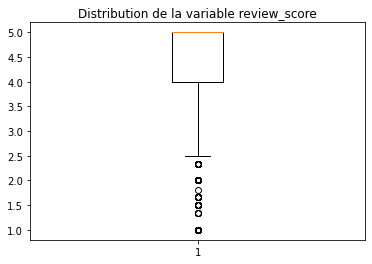

In [57]:
# boite à moustache review score
plt.boxplot(data.review_score)
plt.title('Distribution de la variable review_score')

Text(0.5, 1.0, 'Distribution de la variable payment_value')

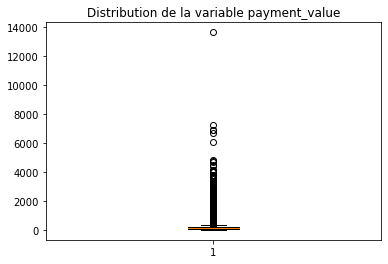

In [58]:
# boite à moustache payment_value
plt.boxplot(data.payment_value)
plt.title('Distribution de la variable payment_value')

Text(0.5, 1.0, 'Distribution de la variable payment_installments')

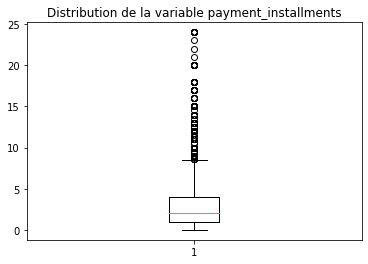

In [59]:
# boite à moustache payment_installments
plt.boxplot(data.payment_installments)
plt.title('Distribution de la variable payment_installments')

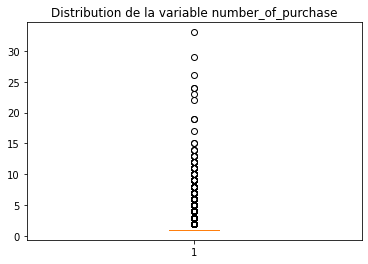

1     90285
2      4569
3       740
4       256
5        82
6        63
7        31
8        13
9        12
10        8
11        7
12        6
13        4
14        3
15        2
24        2
19        2
22        1
26        1
29        1
17        1
33        1
23        1
Name: number_of_purchase, dtype: int64

In [67]:
# boite à moustache number_of_purchase
plt.boxplot(data.number_of_purchase)
plt.title('Distribution de la variable number_of_purchase')
plt.show()
data.number_of_purchase.value_counts()

In [60]:
# machine learning -> scaler mes données

data = data[data['payment_installments'] > 0]

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

data_std = pd.DataFrame(std_scaler.fit_transform(data),
                    columns=data.columns)

data_min_max = pd.DataFrame(min_max_scaler.fit_transform(data),
                        columns=data.columns)

data["payment_installments"] = np.log10(data['payment_installments'].values)
data["payment_value"] = np.log10(data['payment_value'].values)

data_std_log = pd.DataFrame(std_scaler.fit_transform(data),
                    columns=data.columns)

data_min_max_log = pd.DataFrame(min_max_scaler.fit_transform(data),
                        columns=data.columns)

data_scaled = pd.DataFrame(min_max_scaler.fit_transform(data.drop(columns=["payment_installments", "payment_value"])),
                        columns=data.drop(columns=["payment_installments", "payment_value"]).columns)
data_scaled[["payment_installments", "payment_value"]] = std_scaler.fit_transform(data[["payment_installments", "payment_value"]])

In [62]:
data_min_max.describe()

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
count,96091.000000,96091.000000,96091.000000,96091.000000,96091.000000,96091.000000,96091.000000
mean,0.374488,0.123079,0.006955,0.771262,0.082677,0.011481,0.002726
std,0.198353,0.327107,0.026262,0.334135,0.116415,0.016066,0.015414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213731,0.000000,0.000000,0.750000,0.000000,0.004318,0.000000
50%,0.351036,0.000000,0.000000,1.000000,0.043478,0.007458,0.000000
75%,0.515544,0.000000,0.000000,1.000000,0.130435,0.012680,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
data_std.describe()

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
count,9.609100e+04,9.609100e+04,9.609100e+04,9.609100e+04,9.609100e+04,9.609100e+04,9.609100e+04
mean,-4.472272e-17,-1.012280e-15,-1.763124e-15,7.816656e-16,7.576364e-16,-1.016920e-16,-2.652160e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.887995e+00,-3.762675e-01,-2.648140e-01,-2.308247e+00,-7.101977e-01,-7.146305e-01,-1.768458e-01
25%,-8.104650e-01,-3.762675e-01,-2.648140e-01,-6.363321e-02,-7.101977e-01,-4.458699e-01,-1.768458e-01
50%,-1.182337e-01,-3.762675e-01,-2.648140e-01,6.845714e-01,-3.367178e-01,-2.504265e-01,-1.768458e-01
75%,7.111378e-01,-3.762675e-01,-2.648140e-01,6.845714e-01,4.102419e-01,7.458366e-02,-1.768458e-01
max,3.153539e+00,2.680856e+00,3.781297e+01,6.845714e-01,7.879839e+00,6.152760e+01,6.469853e+01


In [385]:
std_data_sample = data_std.sample(frac=0.1, axis=0, random_state=1)

max_data_sample = data_min_max.sample(frac=0.1, axis=0, random_state=1)

max_data_log_sample = data_min_max_log.sample(frac=0.1, axis=0, random_state=1)

data_scaled_sample = data_scaled.sample(frac=0.1, axis=0, random_state=1)

data_sample = data.sample(frac=0.1, axis=0, random_state=1)

## CLUSTERING HIÉRARCHIQUE

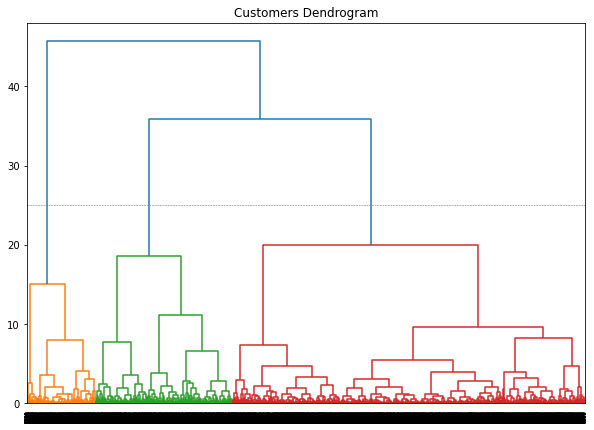

In [31]:
# dendrogramme avec data_min_max

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# 3 ou 4 clusters
clusters = shc.linkage(max_data_sample, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

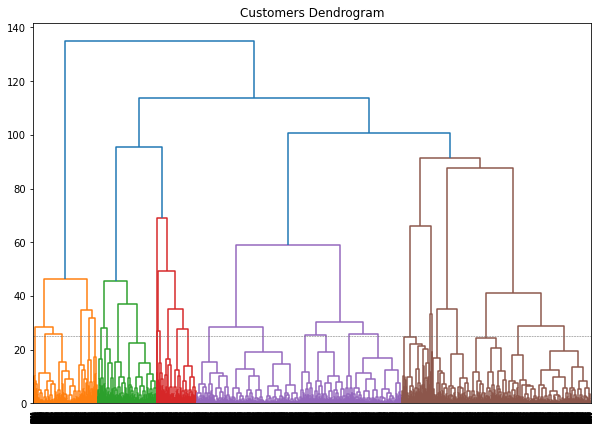

In [32]:
# dendrogramme avec data standardisée

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# 5 clusters
clusters = shc.linkage(std_data_sample, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

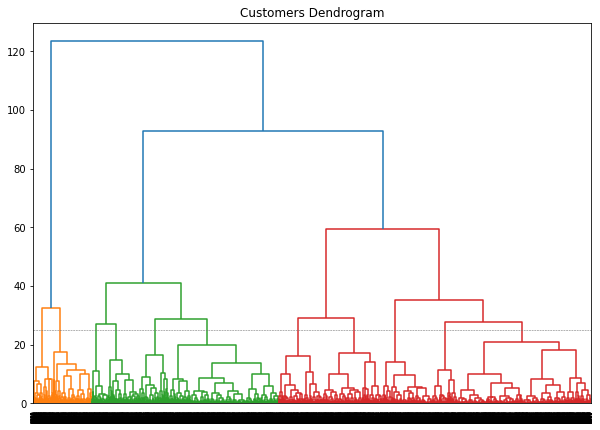

In [33]:
# dendrogramme avec data_scaled

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# 3 clusters
clusters = shc.linkage(data_scaled_sample, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [53]:
# CAH avec mes données 
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(data_scaled_sample)
clustering_model.labels_ 

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 0, ..., 0, 0, 0])

In [62]:
# Les labels du clustering hiérarchique correspondent à la répartition du dendrogramme
np.unique(clustering_model.labels_, return_counts=True)

(array([0, 1, 2]), array([5375, 1016, 3218]))

In [97]:
# réduction de dimension ACP -> les 2 premières composantes explique 38% de la variance
# avec standard scaler

pca = PCA(n_components=7)
pca.fit_transform(data_std_log)
pca.explained_variance_ratio_.cumsum()

array([0.21876934, 0.37849808, 0.52851795, 0.66929117, 0.79794277,
       0.92245319, 1.        ])

In [131]:
# réduction de dimension ACP -> les 2 premières composantes explique 80% de la variance
# avec min max scaler

pca = PCA(n_components=7)
pca.fit_transform(data_min_max)
pca.explained_variance_ratio_.cumsum()

array([0.34704482, 0.66290805, 0.85932695, 0.97638097, 0.99734226,
       0.99929738, 1.        ])

In [77]:
# réduction de dimension ACP -> les 2 premières composantes explique 88% de la variance
# avec combianaison des deux scalers

pca = PCA(n_components=7)
pca.fit_transform(data_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.62453592, 0.88564651, 0.93625506, 0.98245053, 0.99960942,
       0.99989703, 1.        ])

<IPython.core.display.Javascript object>


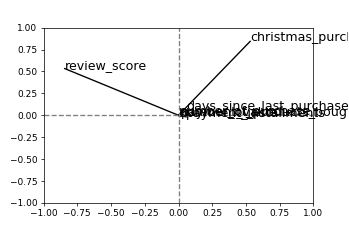

(-1.0, 1.0)

In [132]:
# cercle des correlations, christmas purchase en haut à droite, review score en haut à gauche
%matplotlib notebook
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_fit = pca.fit(data_min_max_log)
pcs = pca_fit.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_min_max.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

# zoomer - matplotlib inline

<IPython.core.display.Javascript object>


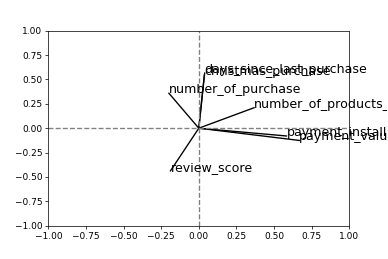

(-1.0, 1.0)

In [133]:
# cercle des correlations data std
%matplotlib notebook

pca = PCA(n_components=2)
pca_fit = pca.fit(data_std_log)
pcs = pca_fit.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_std.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 1])
plt.ylim([-1, 1])

<IPython.core.display.Javascript object>


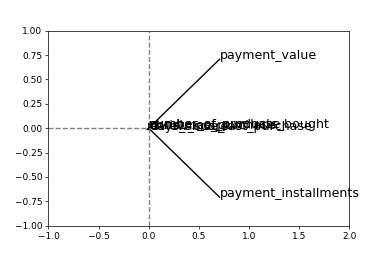

(-1.0, 1.0)

In [134]:
# cercle des correlations data scaled
%matplotlib notebook

pca = PCA(n_components=2)
pca_fit = pca.fit(data_scaled)
pcs = pca_fit.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, data_scaled.columns[i], fontsize='14')

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

plt.xlim([-1, 2])
plt.ylim([-1, 1])

<AxesSubplot:>

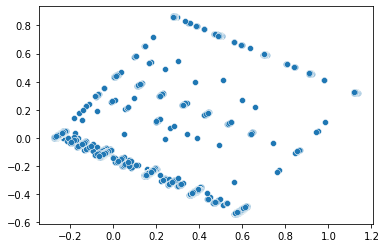

In [138]:
# faire une ACP avec 2 composantes sur data min max
%matplotlib inline
pca = PCA(n_components=2)
pcs = pca.fit_transform(data_min_max)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'ACP - CAH data min max scalée')

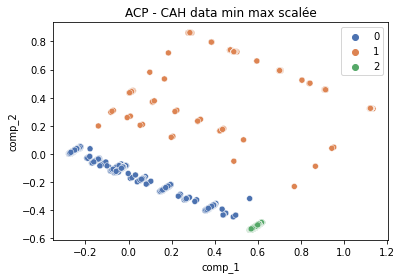

In [139]:
# CAH avec les résultats de l'ACP
pca_df = pd.DataFrame(pcs, columns=['comp_1', 'comp_2'])
sample_pcs = pca_df.sample(frac=0.2, axis=0)

pc1_10k = sample_pcs.iloc[:,0]
pc2_10k = sample_pcs.iloc[:,1]

clustering_model_pca = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(sample_pcs)

data_labels_pca = clustering_model_pca.labels_

sns.scatterplot(x=pc1_10k, 
                y=pc2_10k,
                hue=data_labels_pca,
                palette="deep").set_title('ACP - CAH data min max scalée')

<AxesSubplot:>

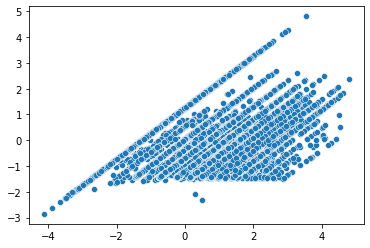

In [140]:
# faire une ACP avec 2 composantes sur data scaled
%matplotlib inline
pca = PCA(n_components=2)
pcs = pca.fit_transform(data_scaled)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'ACP - CAH data scaled')

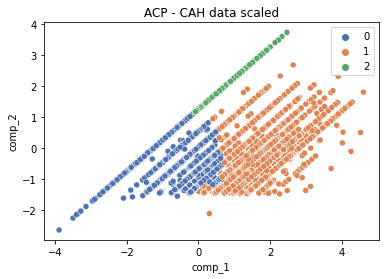

In [141]:
# CAH avec les résultats de l'ACP
pca_df = pd.DataFrame(pcs, columns=['comp_1', 'comp_2'])
sample_pcs = pca_df.sample(frac=0.2, axis=0)

pc1_10k = sample_pcs.iloc[:,0]
pc2_10k = sample_pcs.iloc[:,1]

clustering_model_pca = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(sample_pcs)

data_labels_pca = clustering_model_pca.labels_

sns.scatterplot(x=pc1_10k, 
                y=pc2_10k,
                hue=data_labels_pca,
                palette="deep").set_title('ACP - CAH data scaled')

<AxesSubplot:>

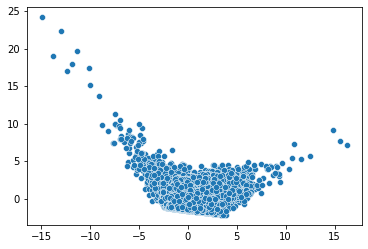

In [142]:
# faire une ACP avec 2 composantes sur data scaled
%matplotlib inline
pca = PCA(n_components=2)
pcs = pca.fit_transform(data_std_log)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'ACP - CAH data standardisée')

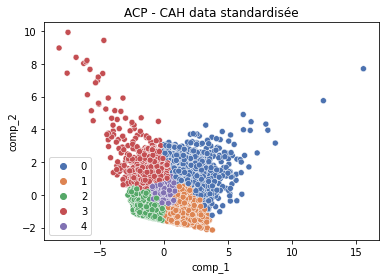

In [143]:
# CAH avec les résultats de l'ACP
pca_df = pd.DataFrame(pcs, columns=['comp_1', 'comp_2'])
sample_pcs = pca_df.sample(frac=0.2, axis=0)

pc1_10k = sample_pcs.iloc[:,0]
pc2_10k = sample_pcs.iloc[:,1]

clustering_model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(sample_pcs)

data_labels_pca = clustering_model_pca.labels_

sns.scatterplot(x=pc1_10k, 
                y=pc2_10k,
                hue=data_labels_pca,
                palette="deep").set_title('ACP - CAH data standardisée')

## KMEANS Data Min Max

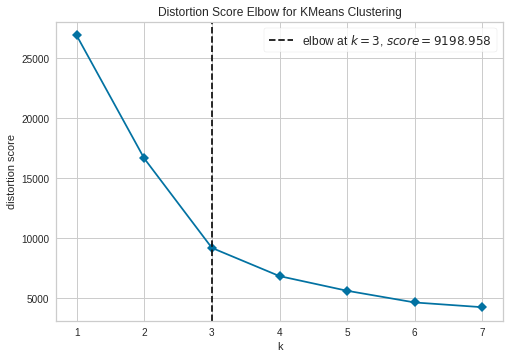

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
# SSE / Sum of squared error / distorsion
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init='auto', init='random')

visualizer = KElbowVisualizer(model, k=(1,8), timings=False)
visualizer.fit(data_min_max)
visualizer.show()

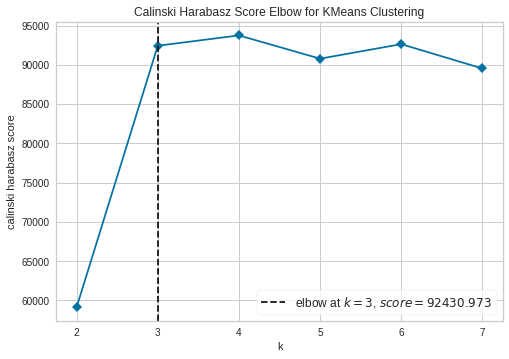

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [67]:
# Indice de Calinski-Harabasz -> rapport entre la variance inter-groupes et la variance intra-groupe
visualizer = KElbowVisualizer(model, k=(2,8), metric='calinski_harabasz', timings=False)
visualizer.fit(data_min_max)
visualizer.show()

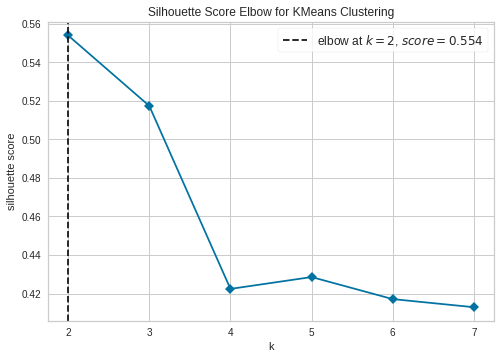

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
# coefficient de silhouette
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)
visualizer.fit(data_min_max)
visualizer.show()

In [69]:
silhouette_coefficients = []
davies_scores = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data_min_max)
    score = silhouette_score(data_min_max, kmeans.labels_)
    davies_score = davies_bouldin_score(data_min_max, kmeans.labels_)
    silhouette_coefficients.append(score)
    davies_scores.append(davies_score)

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/l

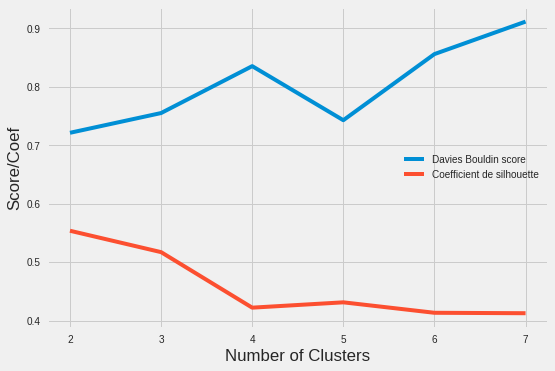

In [70]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), davies_scores)
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Score/Coef")
plt.legend(["Davies Bouldin score", "Coefficient de silhouette"], loc=7)
plt.show()

## KMEANS Data Scaled

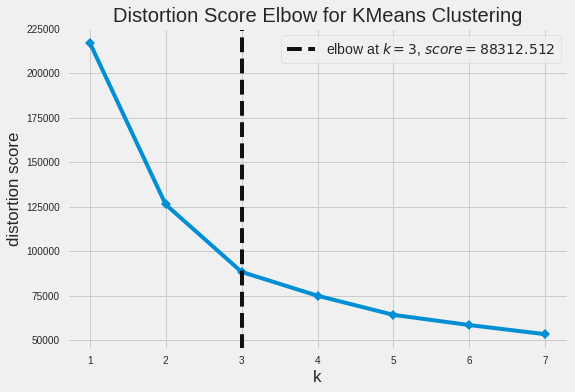

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# SSE / distorsion
kmeans = KMeans(n_init='auto', init='random')

visualizer = KElbowVisualizer(kmeans, k=(1,8), timings=False)
visualizer.fit(data_scaled)
visualizer.show()

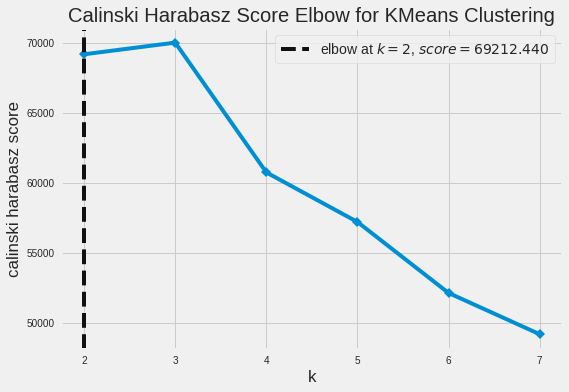

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [72]:
# Indice de Calinski-Harabasz (cherche un score élevé)
visualizer = KElbowVisualizer(kmeans, k=(2,8), metric='calinski_harabasz', timings=False)
visualizer.fit(data_scaled)
visualizer.show()

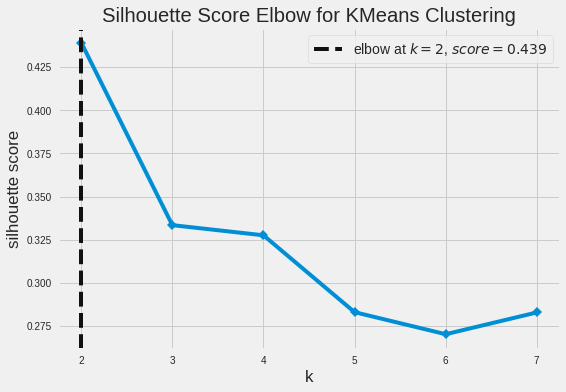

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [73]:
# coefficient de silhouette (entre -1 et 1 -> meilleur clustering)
visualizer = KElbowVisualizer(kmeans, k=(2,8), metric='silhouette', timings=False)
visualizer.fit(data_scaled)
visualizer.show()

In [258]:
silhouette_coefficients = []
davies_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    davies_score = davies_bouldin_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    davies_scores.append(davies_score)

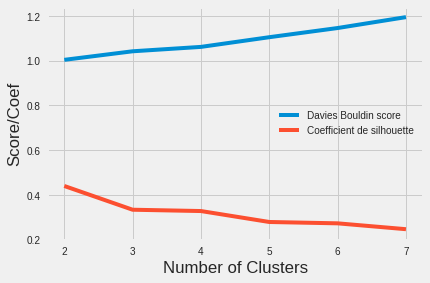

In [257]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), davies_scores)
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Score/Coef")
plt.legend(["Davies Bouldin score", "Coefficient de silhouette"], loc=7)
plt.show()

In [290]:
# enlever le log10 de payment_value / payment_installments
data['payment_value'] = 10**data['payment_value']
data['payment_installments'] = 10**data['payment_installments']

/tmp/ipykernel_32865/1462285915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['payment_value'] = 10**data['payment_value']
/tmp/ipykernel_32865/1462285915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['payment_installments'] = 10**data['payment_installments']


In [310]:
# faire des copies de data
data_std_kmeans_3 = data.copy()
data_std_kmeans_4 = data.copy()
data_std_kmeans_5 = data.copy()

data_min_max_kmeans_3 = data.copy()
data_min_max_kmeans_4 = data.copy()
data_min_max_kmeans_5 = data.copy()

data_scaled_kmeans_3 = data.copy()
data_scaled_kmeans_4 = data.copy()
data_scaled_kmeans_5 = data.copy()

In [311]:
# Clustering kmeans sur data_std 
# plutôt k=5 mais days_sinces_last_purchase est peu pris en compte
# les payments sont mis en avant
for i in range(3,6):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data_std)
    km_labels = kmeans.labels_
    globals()['data_std_kmeans_%s' % i]["kmeans_label"] = km_labels
    display(globals()['data_std_kmeans_%s' % i].groupby('kmeans_label').mean())

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,196.721911,0.170985,1.065491,4.619625,2.610667,134.978077,1.064569
1,282.849749,0.167038,1.458808,1.683428,3.629798,258.743550,1.075421
2,473.172766,0.002085,1.082026,4.549365,3.011943,142.259125,1.138826


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,285.226003,0.138347,3.823695,3.397098,3.742837,374.313788,1.075202
1,279.740740,0.001203,1.069894,4.146392,1.830619,111.336058,1.096309
2,323.132288,0.994406,1.079114,3.961577,2.842453,136.947401,1.079975
3,305.845060,0.014885,1.119657,4.000021,7.562366,354.544665,1.054128


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,323.140507,0.995323,1.079259,3.960476,2.824198,135.758896,1.078100
1,277.651086,0.001377,1.059701,4.742908,1.912953,111.724099,1.095378
2,285.030693,0.137961,3.827012,3.402577,3.747948,373.579063,1.072996
3,288.899299,0.001391,1.120666,1.865040,2.288300,127.035406,1.094887
4,309.617865,0.020374,1.111100,4.290854,7.993149,391.923180,1.052033


In [312]:
# Clustering kmeans sur data_min_max
# -> k=5 mais récence, christmas et review score sont trop mis en avant (normal vu le cercle de corrélation ACP)
for i in range(3,6):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data_min_max)
    km_labels = kmeans.labels_
    globals()['data_min_max_kmeans_%s' % i]["kmeans_label"] = km_labels
    display(globals()['data_min_max_kmeans_%s' % i].groupby('kmeans_label').mean())

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,282.449225,0.001493,1.110059,4.741020,2.848410,154.948682,1.088649
1,322.884863,0.995108,1.145513,3.932379,3.002603,155.808516,1.077740
2,291.197659,0.000878,1.236905,1.879698,3.024491,173.777551,1.088221


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,323.053834,0.988382,1.105781,4.722135,2.924243,149.057675,1.087753
1,283.386575,0.000457,1.114445,4.575312,2.852656,154.426980,1.086671
2,289.878222,0.000422,1.283022,1.231484,3.096960,187.961320,1.087515
3,322.965315,0.990030,1.254853,1.816969,3.223197,173.937342,1.097401


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,315.913369,0.003971,1.168329,2.885303,2.933931,151.009669,1.138383
1,170.615875,0.001072,1.105968,4.746950,2.715021,153.679390,1.071248
2,322.798064,0.996732,1.145237,3.936033,3.001290,155.926460,1.074503
3,471.573062,0.002014,1.115984,4.737975,3.072822,156.969841,1.109649
4,273.007001,0.000825,1.288712,1.153446,3.094068,190.642074,1.073200


In [313]:
# Clustering kmeans sur data_scaled
# -> k=5 mais uniquement les payments sont mis en avant
for i in range(3,6):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data_scaled)
    km_labels = kmeans.labels_
    globals()['data_scaled_kmeans_%s' % i]["kmeans_label"] = km_labels
    display(globals()['data_scaled_kmeans_%s' % i].groupby('kmeans_label').mean())

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,302.259373,0.128046,1.098607,4.093677,5.036068,102.650273,1.077592
1,283.749385,0.121077,1.097009,4.129415,1.184486,93.750350,1.104859
2,288.539711,0.122804,1.317916,3.939898,5.374245,426.599949,1.046201


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,279.064109,0.125119,1.208020,4.057583,1.270568,187.310296,1.051587
1,299.575981,0.127739,1.107863,4.081818,4.865422,111.429616,1.075135
2,292.608659,0.120763,1.291991,3.947592,7.004285,441.071317,1.046048
3,288.844175,0.118960,1.039165,4.167496,1.218808,51.677755,1.143429


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,282.812657,0.123925,1.101324,4.123201,1.230034,98.123071,1.059683
1,293.084961,0.121562,1.280800,3.956817,7.072148,416.408001,1.046035
2,299.624853,0.127158,1.106078,4.082037,4.803137,109.448737,1.076930
3,279.187184,0.126288,1.320745,3.991316,1.266570,295.406811,1.050294
4,289.227064,0.116702,1.023273,4.178380,1.248978,40.068388,1.183215


In [169]:
# groupby cluster meean pour avoir un tableau de moyenne recap avec mes 4 clusters
data_kmeans_4.groupby('kmeans_label').mean()

,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
kmeans_label,,,,,,,
0,169.740257,0.000045,1.066622,4.606803,1.858763,113.342080,1.065471
1,431.646110,0.277306,1.069223,4.575619,1.996947,110.515237,1.134967
2,292.197723,0.145637,1.325291,1.368154,2.414671,160.491732,1.079929
3,303.638217,0.105273,1.295487,4.258785,7.876735,371.944769,1.052904


In [314]:
# afficher la moyenne sur chaque cluster
# data_label_0 = data_kmeans_4[data_kmeans_4["kmeans_label"] == 0]
# data_label_1 = data_kmeans_4[data_kmeans_4["kmeans_label"] == 1]
# data_label_2 = data_kmeans_4[data_kmeans_4["kmeans_label"] == 2]
# data_label_3 = data_kmeans_4[data_kmeans_4["kmeans_label"] == 3]

In [315]:
# cluster 0, commande il y a moins de 6 mois, clients très satisfaits, payent en moins de fois que les autres
# data_label_0.describe(include='all')

In [316]:
# cluster 1, achat il y a moins d'un an, 
# data_label_1.describe(include='all')

In [317]:
# cluster 2, clients très satisfaits
# data_label_2.describe(include='all')

In [318]:
# cluster 3, clients très satisfaits
# data_label_3.describe(include='all')

In [319]:
# sns.scatterplot(x=pc1_values, y=pc2_values, hue=km_labels, palette="viridis")

## DBSCAN

In [387]:
# enlever le log10 de payment_value / payment_installments
data_sample['payment_value'] = 10**data_sample['payment_value']
data_sample['payment_installments'] = 10**data_sample['payment_installments']

In [404]:
# dbscan (avec sous echantillon) 10k
dbscan = DBSCAN(eps=0.1, min_samples=20) #params
dbscan.fit(data_scaled_sample)
print(np.unique(dbscan.labels_))

data_sample["label"] = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

data_sample.groupby('label').mean()

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Estimated number of clusters: 14
Estimated number of noise points: 6826


,days_since_last_purchase,christmas_purchase,number_of_products_bought,review_score,payment_installments,payment_value,number_of_purchase
label,,,,,,,
-1,303.468598,0.136949,1.168784,3.744473,3.664679,190.380836,1.108556
0,266.342564,0.000000,1.055470,5.000000,1.000000,82.631691,1.069231
1,323.213904,1.000000,1.058824,5.000000,1.000000,92.424251,1.032086
2,173.836158,0.000000,1.129944,5.000000,2.000000,136.278842,1.016949
3,178.295082,0.000000,1.000000,4.002789,1.000000,47.896475,1.016393
4,420.285714,0.000000,1.000000,4.000000,1.000000,76.324643,1.000000
5,171.468254,0.000000,1.035714,4.002025,1.000000,69.358512,1.035714
6,324.138889,1.000000,1.000000,5.000000,1.000000,39.841389,1.000000
7,192.000000,0.000000,1.076923,4.005235,1.000000,91.069641,1.046154


<AxesSubplot:>

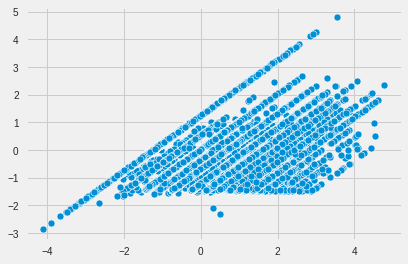

In [397]:
# pca fit sur toute mes données
# la fit sur mes 10k données avec le label
pca = PCA(n_components=2)
pcs_scaled = pca.fit_transform(data_scaled)

pc1_values = pcs_scaled[:,0]
pc2_values = pcs_scaled[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

Text(0.5, 1.0, 'Labeled Customer Data Reduced with PCA')

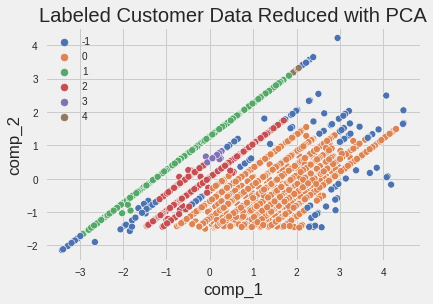

In [405]:
# Dbscan et ACP
pca_df = pd.DataFrame(pcs_scaled, columns=['comp_1', 'comp_2'])
sample_pcs = pca_df.sample(frac=0.2, axis=0, random_state=1)

pc1_10k = sample_pcs.iloc[:,0]
pc2_10k = sample_pcs.iloc[:,1]


dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(sample_pcs)

data_labels_pca = dbscan.labels_

sns.scatterplot(x=pc1_10k, 
                y=pc2_10k,
                hue=data_labels_pca,
                palette="deep").set_title('Labeled Customer Data Reduced with PCA')

In [ ]:
# Maintenance
# me limiter à un an de données
# faire mon algo en janvier sur 40k données
# prédire mes clusters avec cet algo en mars sur mes 50k données
# entrainer un nouveau modèle sur ces 50k données
# score ari pour comparer mes deux algo de clustering

In [216]:
orders_date_with_customer_id['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [461]:
# 06-2107 au bout de 5 mois ari = 0.25        => chute des performances dès 11-2017
# 09-2017 au bout de 9 semaines ari = 0.41       car la variable christmas purchase
# 01-2018 ari = 0.99 tout le temps               prend son sens à cette période
ari_scores = [1]  
ari_scores_initial_scaler = [1]
dates = []
date = pd.Timestamp('2017-06-01')
dates.append(date)
max_date = orders_date_with_customer_id['order_purchase_timestamp'].max()
# init scaler
mm_scaler_0 = MinMaxScaler()
d0 = create_final_df(customers, orders, item_orders, order_reviews, payments, mm_scaler_0, date)
km1 = KMeans(n_clusters=3, n_init='auto')
km1.fit(d0)
while date < max_date:
    date += pd.Timedelta('7 days')
    dates.append(date)
    # créer dn avec un nouveau scaler
    mm_scaler_n = MinMaxScaler()
    dn = create_final_df(customers, orders, item_orders, order_reviews, payments, mm_scaler_n, date)

    # créer un dn scalé avec le scaler initial
    dn_initial_scaler = create_final_df(customers, orders, item_orders, order_reviews, payments, mm_scaler_0, date)
    r1 = km1.predict(dn)
    r1_initial_scaler = km1.predict(dn_initial_scaler)
    km2 = KMeans(n_clusters=3)
    r2 = km2.fit_predict(dn)
    r2_initial_scaler = km2.fit_predict(dn_initial_scaler)
    ari = adjusted_rand_score(r2, r1)
    ari_initial_scaler = adjusted_rand_score(r2_initial_scaler, r1_initial_scaler)
    ari_scores.append(ari)
    ari_scores_initial_scaler.append(ari_initial_scaler)

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

/tmp/ipykernel_32865/2437103429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_32865/2437103429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_32865/2437103429.py:7: SettingWithCop

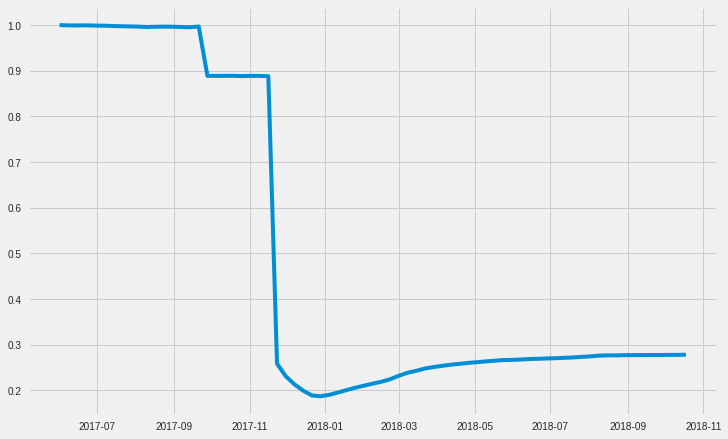

In [455]:
# Depuis 06-2017
plt.figure(figsize=(11,5))
plt.plot(dates, ari_scores)
plt.show()

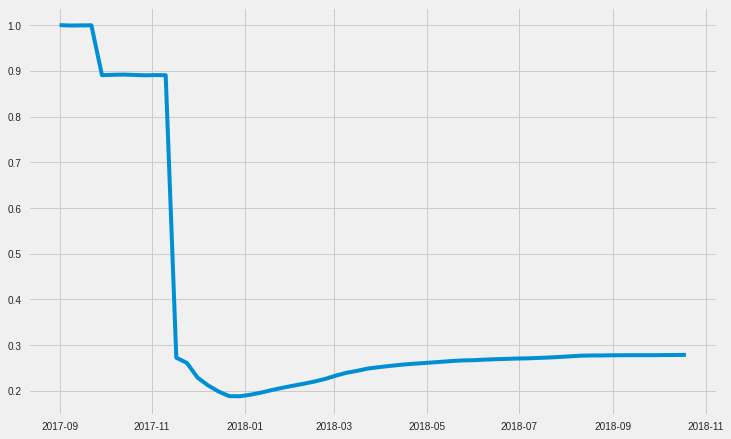

In [452]:
# Depuis 09-2017
plt.figure(figsize=(11,7))
plt.plot(dates, ari_scores)
plt.show()

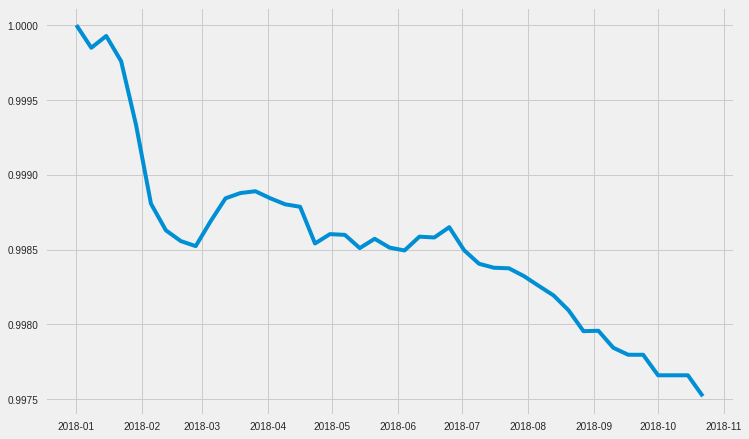

In [459]:
# Depuis 01-2018
plt.figure(figsize=(11,7))
plt.plot(dates, ari_scores)
plt.show()

In [462]:
ari_scores

[1,
 0.9994247409471403,
 0.9992475999078172,
 0.999527600701684,
 0.9990593733742495,
 0.998963316191574,
 0.9981213407556038,
 0.9977597451361224,
 0.9971870887133925,
 0.9973212973715608,
 0.9958173153800672,
 0.9963837585138464,
 0.9966828501375653,
 0.9966226406265585,
 0.9952109895242442,
 0.9952840482623336,
 0.9955051810809579,
 0.8888967592730194,
 0.8886932236798196,
 0.8888200916771659,
 0.8890233319295344,
 0.8883697100293173,
 0.8887365208888303,
 0.888705862117003,
 0.27486714231933035,
 0.25867590161321125,
 0.23082197140938238,
 0.21313435294942595,
 0.199281668031705,
 0.18878209661780398,
 0.1869776355803112,
 0.19007452884317505,
 0.19514789343617703,
 0.20055956113906742,
 0.2057038653372846,
 0.21014091480421945,
 0.2145768415308059,
 0.21875291970222585,
 0.22423878186247273,
 0.23184288774256637,
 0.238460645316806,
 0.24267343350695447,
 0.24776376932071129,
 0.25093083748333034,
 0.2536797287642782,
 0.2560735917673689,
 0.25808390251129987,
 0.2600485034684733

In [463]:
ari_scores_initial_scaler

[1,
 0.9994247409471403,
 0.9992475999078172,
 0.999527600701684,
 0.9984602092877809,
 0.9987165690968202,
 0.9981213407556038,
 0.9972528898991116,
 0.9971870887133925,
 0.9974361162457013,
 0.9958173153800672,
 0.9963837585138464,
 0.9966828501375653,
 0.9966226406265585,
 0.9958487849146305,
 0.9955454997808378,
 0.9969830217762585,
 0.889069679044523,
 0.8886932236798196,
 0.8888200916771659,
 0.8890233319295344,
 0.8882950412677654,
 0.8885913690975249,
 0.8889874260866765,
 0.27486714231933035,
 0.25867590161321125,
 0.23082197140938238,
 0.21313435294942595,
 0.199281668031705,
 0.18878209661780398,
 0.1869776355803112,
 0.19007452884317505,
 0.19514789343617703,
 0.20055956113906742,
 0.2057038653372846,
 0.21014091480421945,
 0.2145768415308059,
 0.21875291970222585,
 0.22423878186247273,
 0.23184288774256637,
 0.238460645316806,
 0.24267343350695447,
 0.24776376932071129,
 0.25093083748333034,
 0.2536797287642782,
 0.2560735917673689,
 0.25808390251129987,
 0.260048503468473

In [410]:
# from sklearn.metrics import fowlkes_mallows_score
 
# fowlkes_mallows_score(r2,r1)

In [409]:
# from sklearn.metrics.cluster import adjusted_mutual_info_score

# adjusted_mutual_info_score(r2,r1)

In [126]:
def create_final_df(customers, orders, item_orders, order_reviews, payments, scaler, date):
    customer_ids = customers[["customer_id", "customer_unique_id"]]
    orders_date_with_customer_id = orders[["customer_id", "order_id", "order_purchase_timestamp"]]
    orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
    orders_date_with_customer_id = orders_date_with_customer_id.merge(how='left', on='customer_id', right=customer_ids)
    orders_limited_date = orders_date_with_customer_id[orders_date_with_customer_id['order_purchase_timestamp'] <= date]
    orders_limited_date['days_since_last_purchase'] = (
    orders_limited_date['order_purchase_timestamp'].max() - orders_limited_date['order_purchase_timestamp']
    ).dt.days
    orders_limited_date['christmas_purchase'] = orders_limited_date['order_purchase_timestamp'].apply(
    lambda x: 1 if ((x.strftime("%m/%d") > "11/01") & (x.strftime("%m/%d") < "12/25")) else 0)
    nb_items_bought = item_orders[["order_id", "order_item_id"]]
    nb_items_bought.drop_duplicates(subset=['order_id'], keep='last', inplace=True, ignore_index=True)
    df = orders_limited_date.merge(how='left', on='order_id', right=nb_items_bought)
    order_score = order_reviews[["order_id", "review_score"]]
    df = df.merge(how='left', on='order_id', right=order_score)
    payments = order_payments[["order_id", "payment_installments", "payment_value"]]
    df = df.merge(how='left', on='order_id', right=payments)
    number_of_purchase = df.groupby('customer_unique_id').size()
    data = df.groupby('customer_unique_id').mean()
    data['number_of_purchase'] = number_of_purchase
    data.rename(columns={'order_item_id':'number_of_products_bought'}, inplace=True)
    data = data[data['payment_installments'] > 0]
    data = data[(~data['payment_value'].isna()) & (data['payment_value'] != 0)]
    data.fillna(data.mean(), inplace=True)
    mms = MinMaxScaler()
    data["payment_installments"] = np.log10(data['payment_installments'].values)
    data["payment_value"] = np.log10(data['payment_value'].values)
    data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=["days_since_last_purchase"])),
                        columns=data.drop(columns=["days_since_last_purchase"]).columns)
    data_scaled[["days_since_last_purchase"]] = mms.fit_transform(data[["days_since_last_purchase"]])

    return data_scaled

In [127]:
 # 01-2018 ari = 0.46 AU BOUT DE 6 SEMAINES, SANS N INIT
#     0.90 si je mms days since last purchase 
ari_scores = [1]  
ari_scores_initial_scaler = [1]
dates = []
date = pd.Timestamp('2018-01-01')
dates.append(date)
max_date = orders_date_with_customer_id['order_purchase_timestamp'].max()
# init scaler
std_scaler_0 = StandardScaler()
d0 = create_final_df(customers, orders, item_orders, order_reviews, payments, std_scaler_0, date)
km1 = KMeans(n_clusters=5)
km1.fit(d0)
while date < max_date:
    date += pd.Timedelta('7 days')
    dates.append(date)
    # créer dn avec un nouveau scaler
    std_scaler_n = StandardScaler()
    dn = create_final_df(customers, orders, item_orders, order_reviews, payments, std_scaler_n, date)

    # créer un dn scalé avec le scaler initial
    dn_initial_scaler = create_final_df(customers, orders, item_orders, order_reviews, payments, std_scaler_0, date)
#     r1 = km1.predict(dn)
    r1_initial_scaler = km1.predict(dn_initial_scaler)
    km2 = KMeans(n_clusters=5)
    r2 = km2.fit_predict(dn)
#     r2_initial_scaler = km2.fit_predict(dn_initial_scaler)
    
    ari = adjusted_rand_score(r2, r1_initial_scaler)
#     ari_initial_scaler = adjusted_rand_score(r2_initial_scaler, r1_initial_scaler)
    ari_scores.append(ari)
#     ari_scores_initial_scaler.append(ari_initial_scaler)

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/home/kilian/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

/tmp/ipykernel_6785/90955800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_date_with_customer_id['order_purchase_timestamp'] = pd.to_datetime(orders_date_with_customer_id['order_purchase_timestamp'])
/tmp/ipykernel_6785/90955800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_limited_date['days_since_last_purchase'] = (
/tmp/ipykernel_6785/90955800.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

<IPython.core.display.Javascript object>


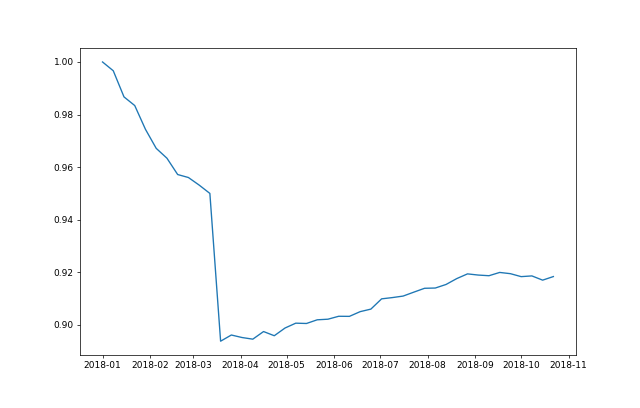

In [128]:
# Depuis 01-2018
plt.figure(figsize=(11,7))
plt.plot(dates, ari_scores)
plt.show()

In [129]:
ari_scores

[1,
 0.9966574254652614,
 0.9867079664778907,
 0.9834176973682058,
 0.9743617420585292,
 0.967130803564141,
 0.9633769391073097,
 0.9571610343561623,
 0.9560258516709361,
 0.9531504776392298,
 0.9499712367402708,
 0.8937303686267372,
 0.8960829108251019,
 0.8951227202254858,
 0.8945031134041911,
 0.8974021105162346,
 0.8958083791686791,
 0.8987407845460149,
 0.9005874036558155,
 0.9004692163048169,
 0.9018691119850399,
 0.9020995165405085,
 0.9032119965785188,
 0.903180638634496,
 0.9049729747458872,
 0.9059425512215712,
 0.9098473295875321,
 0.9103265363402973,
 0.9108987382583632,
 0.9123980417572399,
 0.9138649787564642,
 0.9139634063454847,
 0.9153157434443143,
 0.9175561723783722,
 0.9193477558629113,
 0.9189000608275515,
 0.918648927966955,
 0.9198977933713407,
 0.9194239322198459,
 0.9183009532792082,
 0.9185760552855847,
 0.9169640873797692,
 0.9183281122657293]